# Simple Linear Regression implemented using a basic neural net using PyTorch

Note: Tensor operations performed using GPU and CUDA

#### 1. Loading data, loading modules, preprocessing

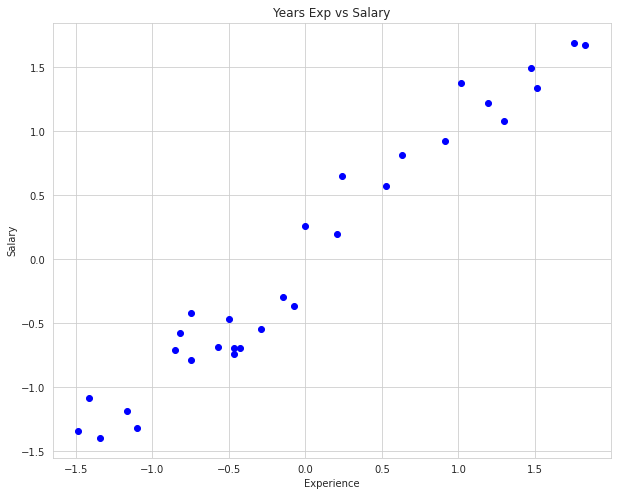

In [69]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

sns.set_style('whitegrid')
filterwarnings('ignore')

cuda = torch.device('cuda')
dataset = pd.read_csv('Salary_Data.csv')

for col in dataset.columns:
    mean = dataset[col].mean()
    sd = dataset[col].std()
    dataset[col] = (dataset[col] - mean) / sd

plt.figure(figsize = [10, 8]);
plt.scatter(dataset['YearsExperience'], dataset['Salary'], c = 'blue');
plt.xlabel('Experience'); plt.ylabel('Salary');
plt.title('Years Exp vs Salary');

#### 2. Neural Net Design

In [0]:
class Network():

    def __init__(self, layers = [1, 1]):
        self.w = []
        for i in range(len(layers)-1):
            self.w.append(torch.rand(layers[i], layers[i+1], 
                                     device = cuda,
                                     requires_grad = True))

    def train(self, x, y, epochs = 100, minibatch_size = 10,
              learning_rate = 0.01):
        for e in range(1, epochs + 1):
            minibatch = x.sample(minibatch_size)
            x_train = torch.from_numpy(minibatch.values.reshape(-1, 1)).float().to(cuda)
            y_train = torch.from_numpy(y.values.reshape(-1, 1)[minibatch.index, :]).float().to(cuda)

            y_pred = x_train.mm(self.w[0])
            for i in range(1, len(self.w)):
                y_pred = y_pred.mm(self.w[i])
            loss = (y_train - y_pred).pow(2).sum()
            print('Epoch {} of {}, loss = {}'.format(e, epochs, loss.item()))
            loss.backward()
            with torch.no_grad():
                for weight in self.w:
                    weight -= weight.grad * learning_rate
                    weight.grad.zero_()

    def pred(self, x):
        predx = torch.from_numpy(x.values.reshape(-1, 1)).float().to(cuda)
        y_pred = predx.mm(self.w[0])
        for i in range(1, len(self.w)):
            y_pred = y_pred.mm(self.w[i])
        return y_pred.detach().cpu().numpy()
    
    def __repr__(self):
        return str(self.w)

#### 3. Neural Net training

In [79]:
n = Network([1, 1])
n.train(dataset['YearsExperience'], dataset['Salary'], 
        epochs = 50, minibatch_size = 10)

Epoch 1 of 50, loss = 4.490486145019531
Epoch 2 of 50, loss = 3.55183482170105
Epoch 3 of 50, loss = 3.544008731842041
Epoch 4 of 50, loss = 1.8770411014556885
Epoch 5 of 50, loss = 1.3603627681732178
Epoch 6 of 50, loss = 1.1892497539520264
Epoch 7 of 50, loss = 0.8889604806900024
Epoch 8 of 50, loss = 0.8396782875061035
Epoch 9 of 50, loss = 0.5322450995445251
Epoch 10 of 50, loss = 0.3965603709220886
Epoch 11 of 50, loss = 0.4760042428970337
Epoch 12 of 50, loss = 0.5222398638725281
Epoch 13 of 50, loss = 0.20763729512691498
Epoch 14 of 50, loss = 0.30142608284950256
Epoch 15 of 50, loss = 0.40146785974502563
Epoch 16 of 50, loss = 0.3567007780075073
Epoch 17 of 50, loss = 0.1659649759531021
Epoch 18 of 50, loss = 0.6111904382705688
Epoch 19 of 50, loss = 0.16873815655708313
Epoch 20 of 50, loss = 0.5874754786491394
Epoch 21 of 50, loss = 0.4152810573577881
Epoch 22 of 50, loss = 0.36957287788391113
Epoch 23 of 50, loss = 0.45558595657348633
Epoch 24 of 50, loss = 0.2531548440456390

#### 4. Prediction and end results

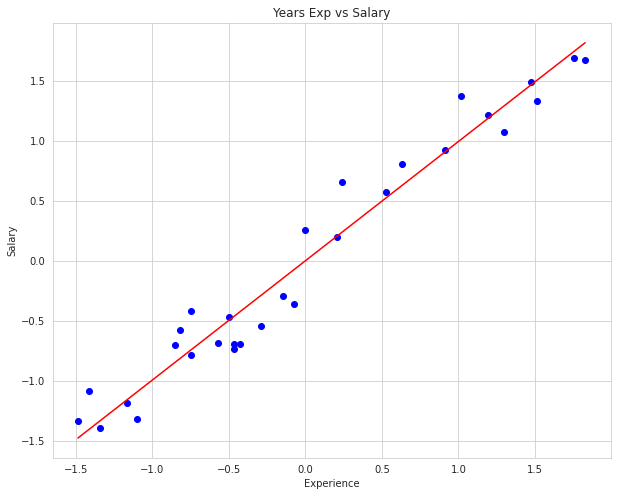

In [80]:
y_pred = n.pred(dataset['YearsExperience'])

plt.figure(figsize = [10, 8]);
plt.scatter(dataset['YearsExperience'], dataset['Salary'], c = 'blue');
plt.plot(dataset['YearsExperience'], y_pred, c = 'red')
plt.xlabel('Experience'); plt.ylabel('Salary');
plt.title('Years Exp vs Salary');